# Read_WRF_towers
Use mmctools tslist class and tslist_seriesReader to read tower output for the FINO offshore microscale simulations.<br>
Save tslist dataseries to pdata file

## Set file paths, import 'sys' module for setting filepath

In [7]:
wrf_dir = '/p/lscratchh/lassman1/a2e-mmc/WRF/FINO/ERA5_grid2.0/'
cases = ['microscale_setup_v2_CONTROL', 'microscale_setup_v2_CPM']

pdata_save_dir = '/p/lscratchh/lassman1/a2e-mmc/pdata/FINO/'


restarts = ['tsout_01:00-01:20', 'tsout_01:20-01:40', 'tsout_01:40-02:00',\
            'tsout_02:00-02:20', 'tsout_02:20-02:40', 'tsout_02:40-03:00',\
            'tsout_03:00-03:20', 'tsout_03:20-03:40', 'tsout_03:40-04:00',\
            'tsout_04:00-04:20', 'tsout_04:20-04:40', 'tsout_04:40-05:00']

case_days_start = ['2010-05-16']
case_days_end = ['2010-05-16']

#wrf_start_times = ['2010-05-16 01:00', '2010-05-16 01:20', '2010-05-16 01:40', \
#                   '2010-05-16 02:00', '2010-05-16 02:20', '2010-05-16 02:40', \
#                   '2010-05-16 03:00', '2010-05-16 03:20', '2010-05-16 03:40', \
#                   '2010-05-16 04:00', '2010-05-16 04:20', '2010-05-16 04:40' ]

wrf_start_times = ['2010-05-14 12:00', '2010-05-14 12:00', '2010-05-14 12:00', \
                   '2010-05-14 12:00', '2010-05-14 12:00', '2010-05-14 12:00', \
                   '2010-05-14 12:00', '2010-05-14 12:00', '2010-05-14 12:00', \
                   '2010-05-14 12:00', '2010-05-14 12:00', '2010-05-14 12:00']



wrf_dt = 0.025 #[seconds]
import sys
import os

module_path = os.path.join(os.environ['HOME'],'code/Python/a2e-mmc/')
#module_path = os.path.join(os.environ['HOME'],'mmc/mmc_github_clones/')                                                          
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
ts_heights = [5.0, 10.0,  15.0, 20.0, 25.0, 30.0, 33.0, 35.0, 40.0, 45.0, 50.0, \
                  55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 110.0, \
                  125.0, 150.0, 200.0],

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from matplotlib.colors import Normalize

from mmctools.wrf.utils import Tower, combine_towers, tsout_seriesReader

In [9]:
n_case_days = len(case_days_start)
ncases = len(cases)

In [4]:
# Where the tslist output are located:
twr_file_loc = '/p/lscratchh/lassman1/a2e-mmc/WRF/FINO/ERA5_grid2.0/microscale_setup_v2_CONTROL/tsout_01:00-01:20/'
# Which tower you want to read in, and which domain:
twr_file_name = 'ARR09.d06' # 'FN1' is the name, 'd03' is for the third domain
twr_file_path = '{}{}'.format(twr_file_loc,twr_file_name)

In [5]:
single_tower = Tower(twr_file_path)

type(single_tower)

mmctools.wrf.utils.Tower

In [6]:
print(single_tower.time)

[37.000008 37.000011 37.000019 ... 37.398598 37.398605 37.398613]


In [8]:
# Create combined tower DataArray (this may take a while)
#twrs_combined_CONTROL = tsout_seriesReader(fdir=wrf_dir + cases[0]+'/',
#                                       restarts=restarts,
#                                       simulation_start_time=wrf_start_times,
#                                       structure='unordered',
#                                       time_step=wrf_dt,
#                                       domain_of_interest='d06',
#                                       heights=[5.0, 10.0,  15.0, 20.0, \
#                                                25.0, 30.0, 33.0, 35.0, \
#                                                40.0, 45.0, 50.0, 55.0, \
#                                                60.0, 65.0, 70.0, 75.0, \
#                                                80.0, 85.0, 90.0, 95.0, \
#                                                100.0, 110.0, 125.0, 150.0, 200.0],
#                                       height_var='ph',
#                                       select_tower = ['ARR06', 'ARR07', 'ARR08', 'ARR09']
#                                       )
twrs_combined_CONTROL = tsout_seriesReader(fdir=wrf_dir + cases[0]+'/',
                                       restarts=restarts[1:],
                                       simulation_start_time=wrf_start_times[1:],
                                       structure='unordered',
                                       time_step=wrf_dt,
                                       domain_of_interest='d06',
                                       heights=[5.0, 10.0,  15.0, 20.0, \
                                                25.0, 30.0, 33.0, 35.0, \
                                                40.0, 45.0, 50.0, 55.0, \
                                                60.0, 65.0, 70.0, 75.0, \
                                                80.0, 85.0, 90.0, 95.0, \
                                                100.0, 110.0, 125.0, 150.0, 200.0],                                       
                                       height_var='ph',
                                       select_tower = ['ARR06', 'ARR07', 'ARR08', 'ARR09']
                                       )
#33.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0

restart: tsout_01:20-01:40
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_01:40-02:00
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_02:00-02:20
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_02:20-02:40
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_02:40-03:00
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_03:00-03:20
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_03:20-03:40
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_03:40-04:00
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_04:00-04:20
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_04:20-04:40
starting ARR06.d06
starting ARR07.d06
starting

In [9]:
# Create combined tower DataArray (this may take a while)

twrs_combined_CPM = tsout_seriesReader(fdir=wrf_dir + cases[1]+'/',
                                       restarts=restarts[1:],
                                       simulation_start_time=wrf_start_times[1:],
                                       structure='unordered',
                                       #time_step=wrf_dt,
                                       domain_of_interest='d06',
                                       heights=[5.0, 10.0,  15.0, 20.0, \
                                                25.0, 30.0, 33.0, 35.0, \
                                                40.0, 45.0, 50.0, 55.0, \
                                                60.0, 65.0, 70.0, 75.0, \
                                                80.0, 85.0, 90.0, 95.0, \
                                                100.0, 110.0, 125.0, 150.0, 200.0],                                       
                                       height_var='ph',
                                       select_tower = ['ARR06', 'ARR07', 'ARR08', 'ARR09']
                                       )

restart: tsout_01:20-01:40
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_01:40-02:00
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_02:00-02:20
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_02:20-02:40
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_02:40-03:00
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_03:00-03:20
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_03:20-03:40
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_03:40-04:00
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_04:00-04:20
starting ARR06.d06
starting ARR07.d06
starting ARR08.d06
starting ARR09.d06
restart: tsout_04:20-04:40
starting ARR06.d06
starting ARR07.d06
starting

In [10]:
print(twrs_combined_CPM.datetime)
print(twrs_combined_CONTROL.datetime)

<xarray.DataArray 'datetime' (datetime: 531000)>
array(['2010-05-16T01:20:00.024000000', '2010-05-16T01:20:00.049200000',
       '2010-05-16T01:20:00.078000000', ..., '2010-05-16T05:01:14.955600000',
       '2010-05-16T05:01:14.980800000', '2010-05-16T05:01:14.995200000'],
      dtype='datetime64[ns]')
Coordinates:
  * datetime  (datetime) datetime64[ns] 2010-05-16T01:20:00.024000 ... 2010-0...
<xarray.DataArray 'datetime' (datetime: 514200)>
array(['2010-05-16T01:18:00.025000000', '2010-05-16T01:18:00.050000000',
       '2010-05-16T01:18:00.075000000', ..., '2010-05-16T05:03:14.950000000',
       '2010-05-16T05:03:14.975000000', '2010-05-16T05:03:15.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * datetime  (datetime) datetime64[ns] 2010-05-16T01:18:00.025000 ... 2010-0...


### Save to process data files

In [11]:
twrs_combined_CPM.to_netcdf( pdata_save_dir + 'setup_2_tslist_cpm.nc')

In [12]:
twrs_combined_CONTROL.to_netcdf( pdata_save_dir + 'setup_2_tslist_control.nc')

### Some calculations and a plot to verify things are working correctly

In [13]:


print(twrs_combined_CONTROL.coords)
print( type(twrs_combined_CONTROL.datetime.values[0]), twrs_combined_CONTROL.datetime.values[0])


Coordinates:
    lat       (station) float64 54.02 54.02 54.02 54.01
    lon       (station) float64 6.542 6.558 6.573 6.588
    zsurface  (station) float64 0.0 0.0 0.0 0.0
  * datetime  (datetime) datetime64[ns] 2010-05-16T01:18:00.025000 ... 2010-0...
  * station   (station) object 'ARR06' 'ARR07' 'ARR08' 'ARR09'
    height    (datetime, nz, station) float64 nan nan nan ... 200.0 200.0 200.0
<class 'numpy.datetime64'> 2010-05-16T01:18:00.025000000


In [14]:


print(twrs_combined_CONTROL.coords)
print( type(twrs_combined_CONTROL.datetime.values[0]), twrs_combined_CONTROL.datetime.values[0])
print(np.datetime64('2010-05-17T14:38:00.025000000' ))

Coordinates:
    lat       (station) float64 54.02 54.02 54.02 54.01
    lon       (station) float64 6.542 6.558 6.573 6.588
    zsurface  (station) float64 0.0 0.0 0.0 0.0
  * datetime  (datetime) datetime64[ns] 2010-05-16T01:18:00.025000 ... 2010-0...
  * station   (station) object 'ARR06' 'ARR07' 'ARR08' 'ARR09'
    height    (datetime, nz, station) float64 nan nan nan ... 200.0 200.0 200.0
<class 'numpy.datetime64'> 2010-05-16T01:18:00.025000000
2010-05-17T14:38:00.025000000


In [17]:
twrs_combined_CONTROL['wspd'] = np.sqrt( twrs_combined_CONTROL['u']**2. + twrs_combined_CONTROL['v']**2. )
twrs_combined_CPM['wspd'] = np.sqrt( twrs_combined_CPM['u']**2. + twrs_combined_CPM['v']**2. )

In [26]:
print(twrs_combined_CONTROL.height.sel( station = 'ARR09').isel(datetime = -1).values )

[  5.  10.  15.  20.  25.  30.  33.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 110. 125. 150. 200.]


2010-05-16T05:03:15.000000000 2010-05-16T01:18:00.025000000


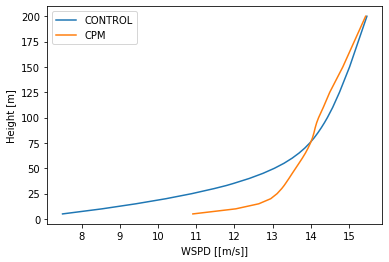

In [31]:
### Quick calculation and plot
t0 = pd.to_datetime( '2010-05-16T01:40:00' )
tf = pd.to_datetime( '2010-05-16T02:00:00' )
print( twrs_combined_CONTROL.datetime.values[-1],  twrs_combined_CONTROL.datetime.values[0])

#test = twrs_combined_CONTROL.u.sel( station = 'ARR09', datetime = slice(t0, tf) )#.mean(dim = 'datetime')
#print(test.values)
plt.figure()
plt.plot( twrs_combined_CONTROL.wspd.sel( station = 'ARR09', \
                            datetime = slice(t0, tf) ).mean(dim = 'datetime'), \
          twrs_combined_CONTROL.height.sel( station = 'ARR09').isel(datetime = -1),
          label = 'CONTROL' )

plt.plot( twrs_combined_CPM.wspd.sel( station = 'ARR09', \
                            datetime = slice(t0, tf) ).mean(dim = 'datetime'), \
          twrs_combined_CPM.height.sel( station = 'ARR09').isel(datetime = -1),
          label = 'CPM' )
plt.xlabel('WSPD [[m/s]]')
plt.ylabel('Height [m]')
plt.legend(loc = 'best')